In [7]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('Dataset.xlsx')
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
9330,1.5,14,Clay,55
9331,3.0,21,Clay,60
9332,4.5,22,Clay,160
9333,6.0,17,Clay,190


In [2]:
data.describe()

,Depth (m),SPT_N,Vs (m/s)
count,9335.000000,9335.000000,9335.000000
mean,21.177718,30.400321,272.850777
std,13.061581,24.159687,113.245977
min,1.500000,1.000000,15.000000
25%,10.500000,13.000000,195.000000
50%,19.500000,24.000000,260.000000
75%,30.000000,41.000000,340.000000
max,79.500000,462.000000,850.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9335 entries, 0 to 9334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth (m)  9335 non-null   float64
 1   SPT_N      9335 non-null   int64  
 2   Soil Type  9335 non-null   object 
 3   Vs (m/s)   9335 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 291.8+ KB


# Data Range and Frequency

## Depth

/tmp/ipykernel_15672/3255913079.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], color='green', shade=True)


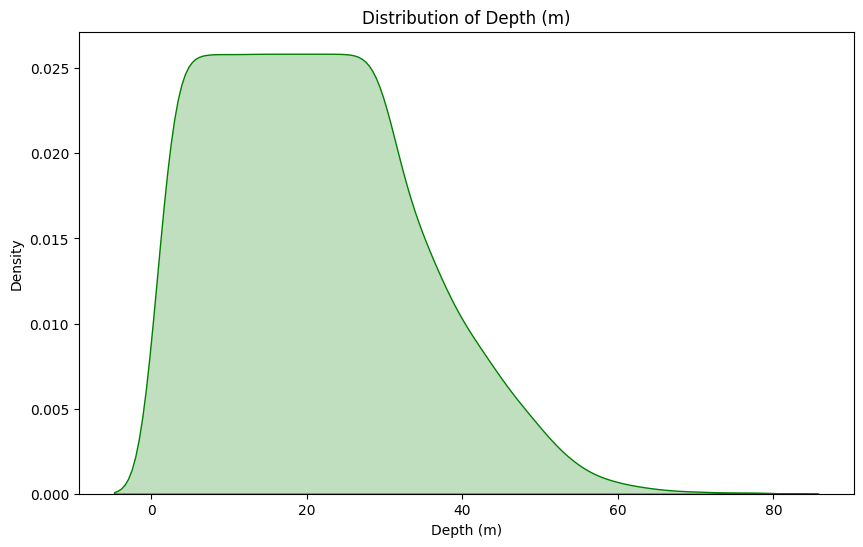

In [16]:
column_name = 'Depth (m)'

plt.figure(figsize=(10, 6)) 
sns.kdeplot(data[column_name], color='green', shade=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

# SPT_N

/tmp/ipykernel_15672/95614682.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], color='green', shade=True)


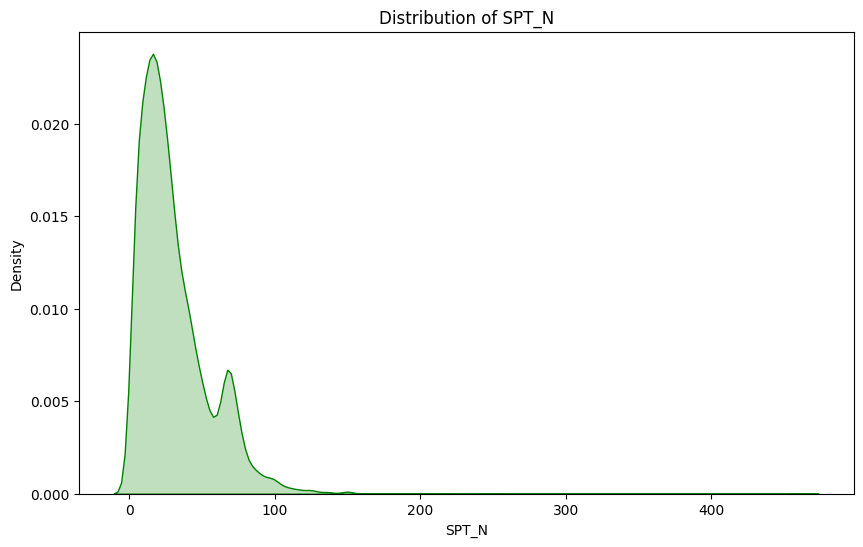

In [24]:
column_name = 'SPT_N'

plt.figure(figsize=(10, 6)) 
sns.kdeplot(data[column_name], color='green', shade=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

## Vs (m/s)

/tmp/ipykernel_15672/851946008.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], color='green', shade=True)


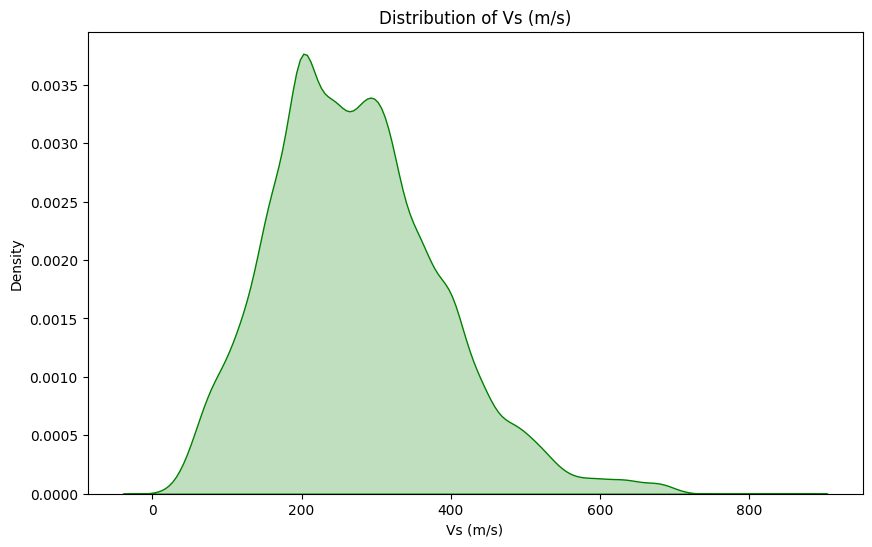

In [25]:
column_name = 'Vs (m/s)'

plt.figure(figsize=(10, 6)) 
sns.kdeplot(data[column_name], color='green', shade=True)
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

## Soil Type

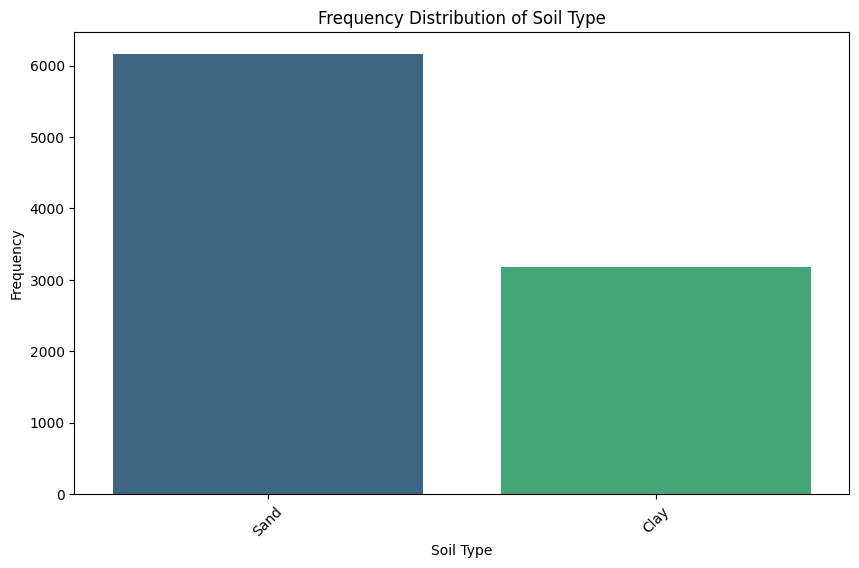

In [27]:
column_name = 'Soil Type'

value_counts = data[column_name].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title(f'Frequency Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

## 3D Correlation

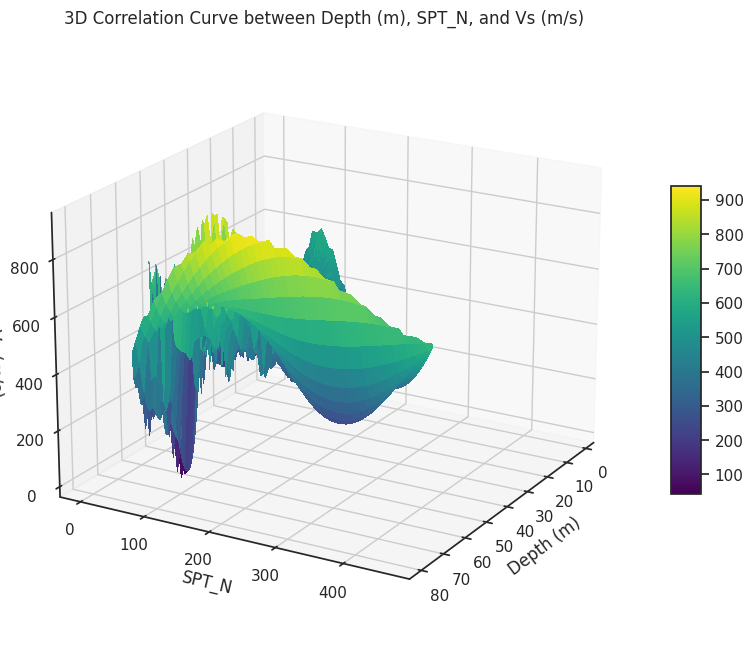

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata


columns_to_plot = ["Depth (m)", "SPT_N", "Vs (m/s)"]


x = data[columns_to_plot[0]]
y = data[columns_to_plot[1]]
z = data[columns_to_plot[2]]


xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


zi = griddata((x, y), z, (xi, yi), method='cubic')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=False)


ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])


ax.set_zlabel(columns_to_plot[2], rotation=90)


ax.set_title(f'3D Correlation Curve between {columns_to_plot[0]}, {columns_to_plot[1]}, and {columns_to_plot[2]}')


ax.view_init(elev=20, azim=30)


fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

In [63]:
data = pd.get_dummies(data, columns=["Soil Type"], prefix=["Soil_Type"], drop_first=True, dtype=int)
data

,Depth (m),SPT_N,Vs (m/s),Soil_Type_Sand
0,1.5,4,70,1
1,3.0,5,135,1
2,4.5,3,175,1
3,6.0,2,200,1
4,7.5,10,290,1
...,...,...,...,...
9330,1.5,14,55,0
9331,3.0,21,60,0
9332,4.5,22,160,0
9333,6.0,17,190,0


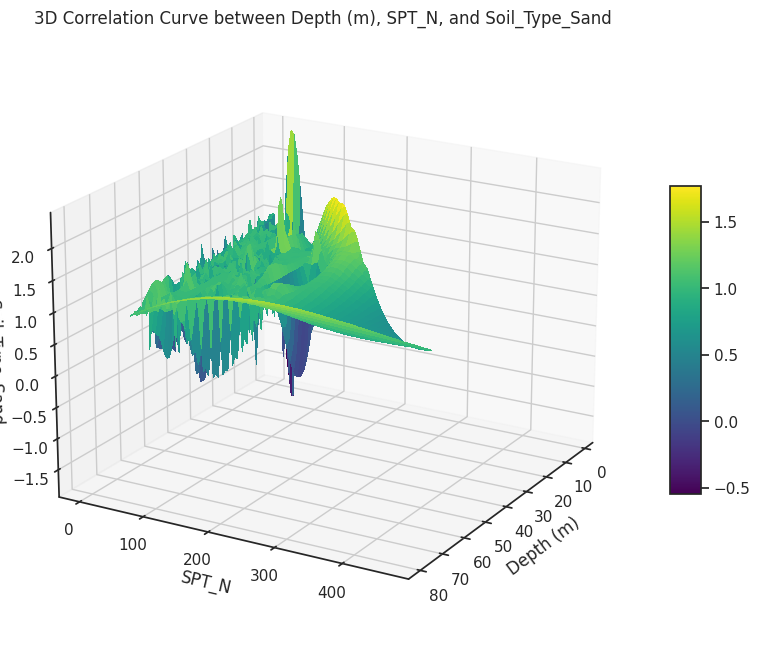

In [64]:
columns_to_plot = ["Depth (m)", "SPT_N", "Soil_Type_Sand"]


x = data[columns_to_plot[0]]
y = data[columns_to_plot[1]]
z = data[columns_to_plot[2]]


xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


zi = griddata((x, y), z, (xi, yi), method='cubic')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=False)


ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])


ax.set_zlabel(columns_to_plot[2], rotation=90)


ax.set_title(f'3D Correlation Curve between {columns_to_plot[0]}, {columns_to_plot[1]}, and {columns_to_plot[2]}')


ax.view_init(elev=20, azim=30)


fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()


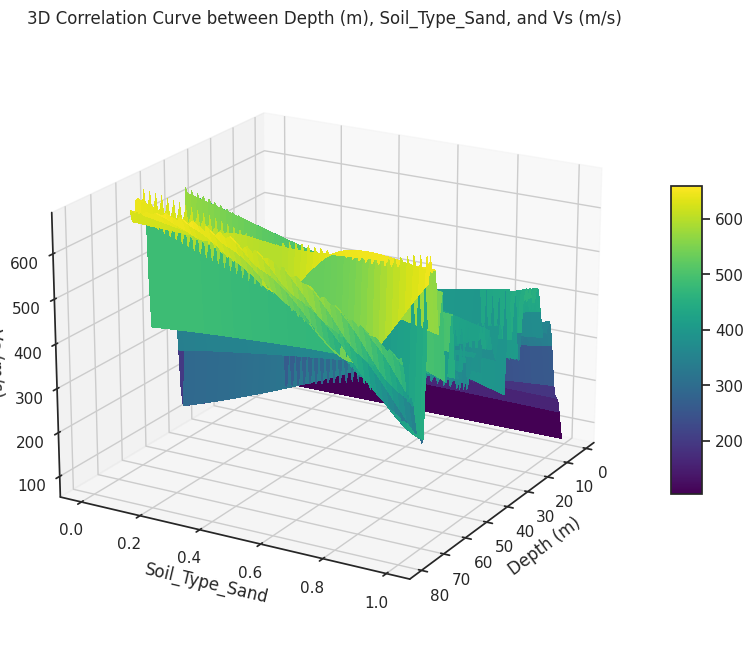

In [66]:
columns_to_plot = ["Depth (m)", "Soil_Type_Sand", "Vs (m/s)"]


x = data[columns_to_plot[0]]
y = data[columns_to_plot[1]]
z = data[columns_to_plot[2]]


xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


zi = griddata((x, y), z, (xi, yi), method='cubic')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=False)


ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])


ax.set_zlabel(columns_to_plot[2], rotation=90)


ax.set_title(f'3D Correlation Curve between {columns_to_plot[0]}, {columns_to_plot[1]}, and {columns_to_plot[2]}')


ax.view_init(elev=20, azim=30)


fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

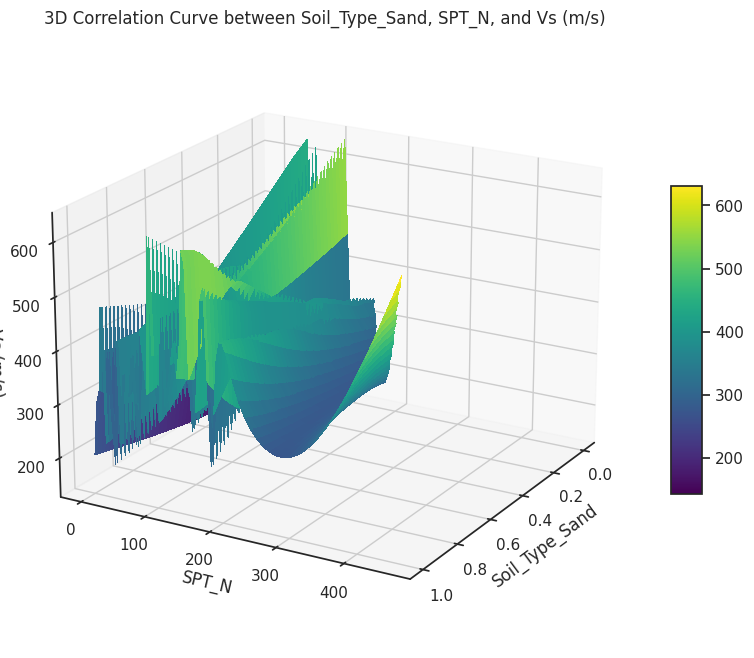

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata


columns_to_plot = ["Soil_Type_Sand", "SPT_N", "Vs (m/s)"]


x = data[columns_to_plot[0]]
y = data[columns_to_plot[1]]
z = data[columns_to_plot[2]]


xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


zi = griddata((x, y), z, (xi, yi), method='cubic')


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


surface = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=False)


ax.set_xlabel(columns_to_plot[0])
ax.set_ylabel(columns_to_plot[1])


ax.set_zlabel(columns_to_plot[2], rotation=90)


ax.set_title(f'3D Correlation Curve between {columns_to_plot[0]}, {columns_to_plot[1]}, and {columns_to_plot[2]}')


ax.view_init(elev=20, azim=30)


fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

# Correlation with the Dependent Variable

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


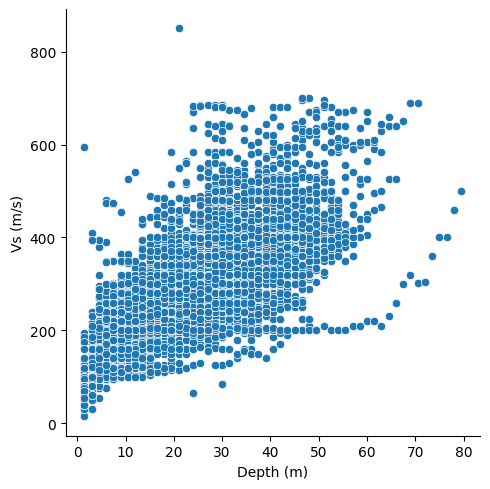

In [15]:
sns.relplot(data=data, x="Depth (m)", y="Vs (m/s)")

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


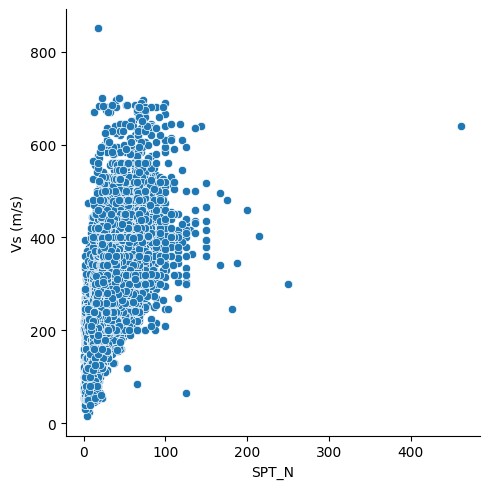

In [16]:
sns.relplot(data=data, x="SPT_N", y="Vs (m/s)")

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


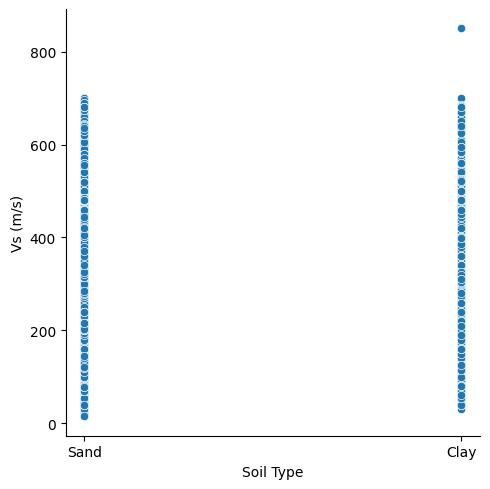

In [17]:
sns.relplot(data=data, x="Soil Type", y="Vs (m/s)")

## 2D Correlation with each other

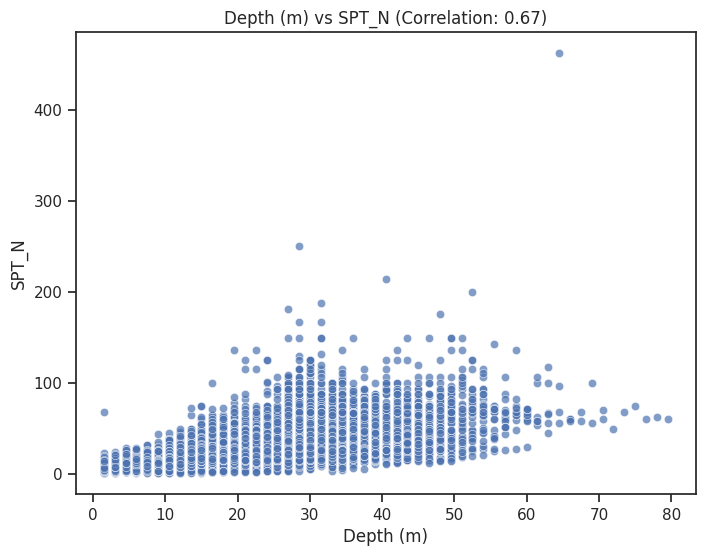

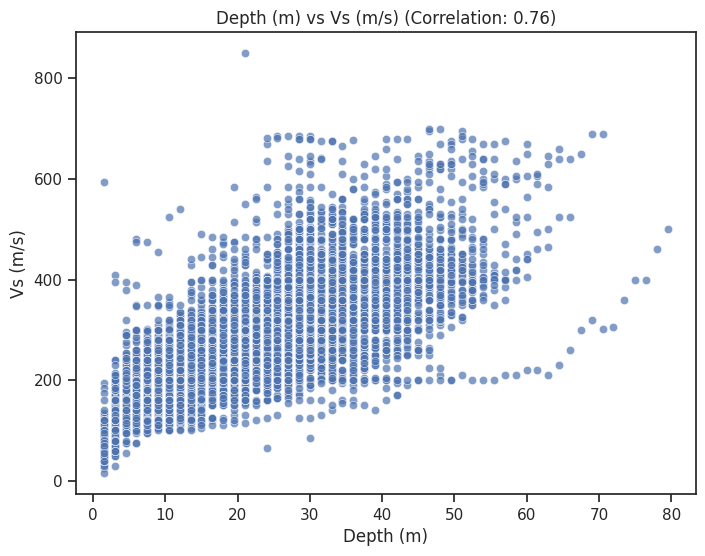

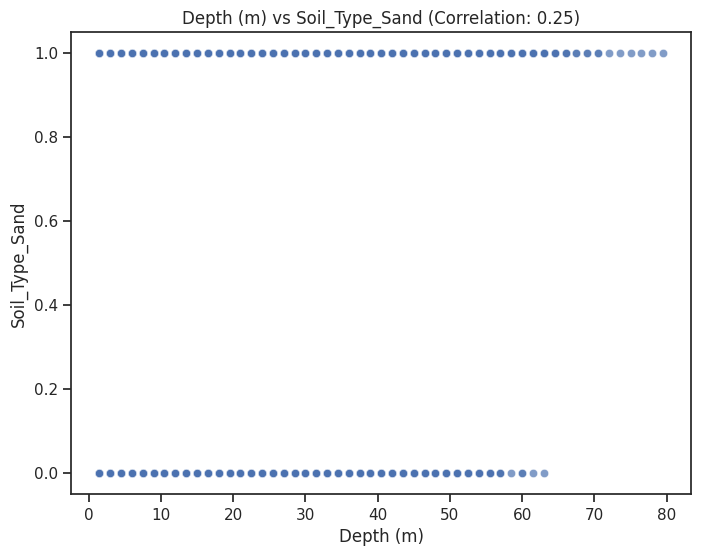

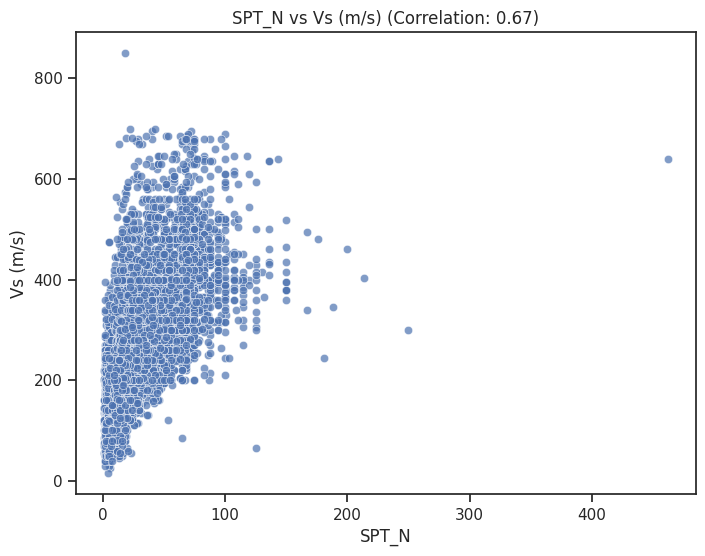

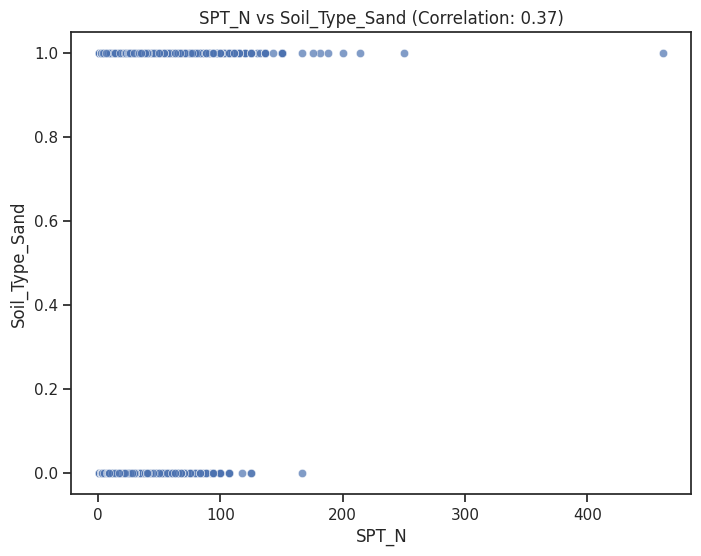

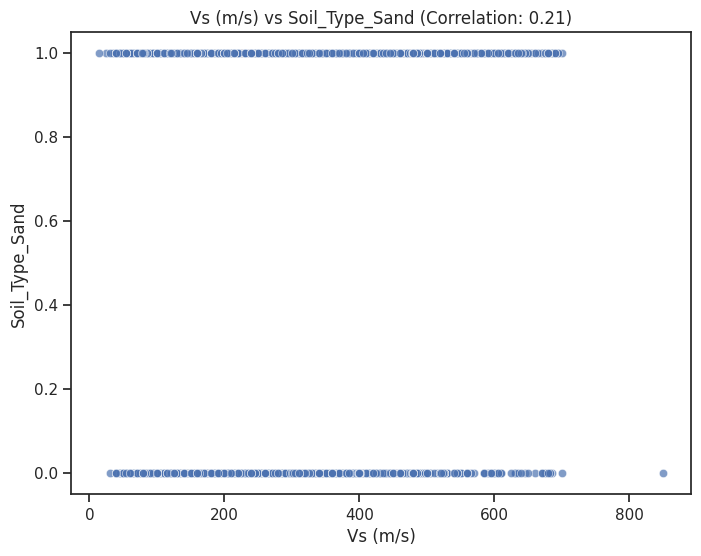

In [68]:
correlation_matrix = data.corr()

columns = data.columns


for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(8, 6))
        
        
        sns.scatterplot(data=data, x=columns[i], y=columns[j], alpha=0.7)
        
        
        correlation_coeff = correlation_matrix.iloc[i, j]
        plt.title(f'{columns[i]} vs {columns[j]} (Correlation: {correlation_coeff:.2f})')
        
        plt.show()

# Heatmap Correlation

<Axes: >

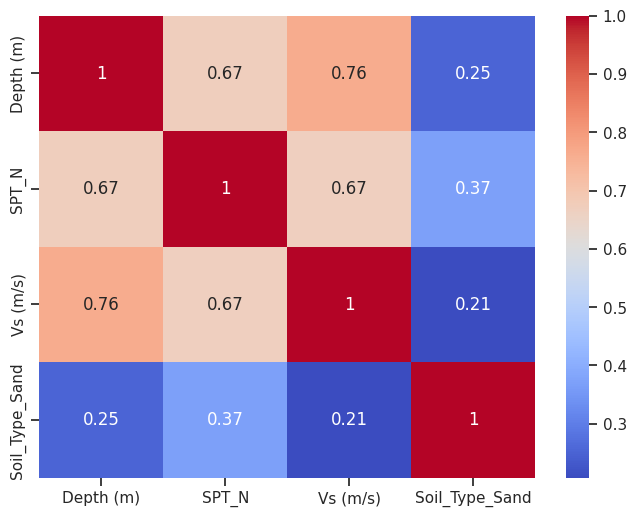

In [81]:
corr=data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)


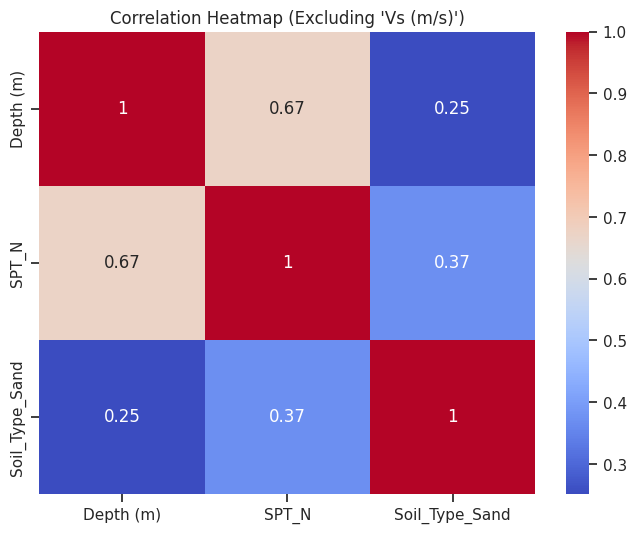

In [82]:
corr = data.drop(columns=['Vs (m/s)']).corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap (Excluding 'Vs (m/s)')")
plt.show()

## Depth(m) has the heighest correlation with the dependent variable (Vs(m/s))

# Data Distribution of each column

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Figure size 800x1200 with 0 Axes>

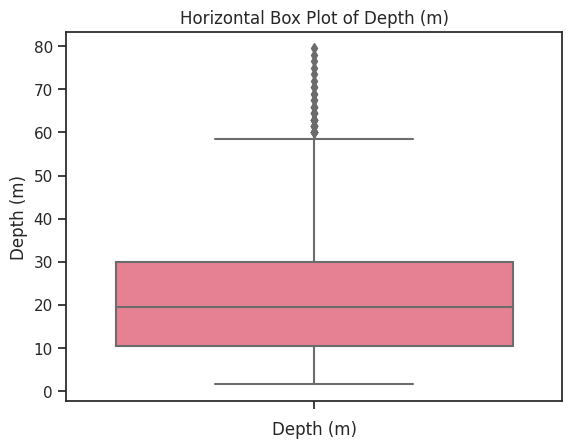

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


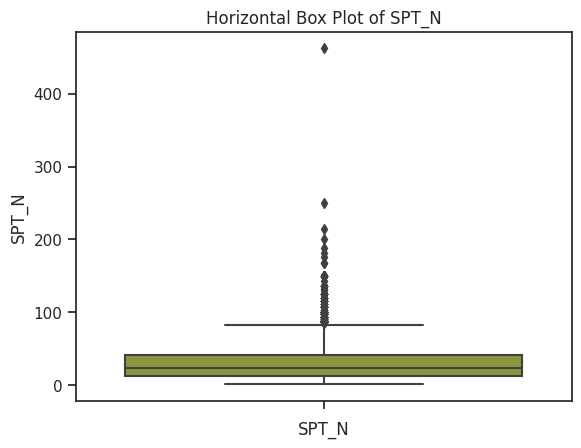

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


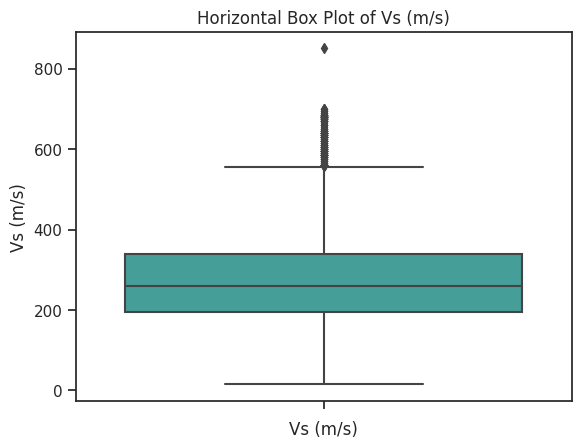

/home/jadid/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


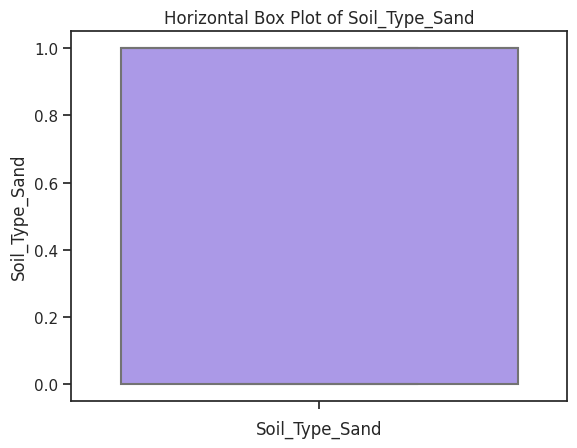

In [74]:
plt.figure(figsize=(8, 12))  


palette = sns.color_palette("husl", len(data.columns))

for i, column in enumerate(data.columns):
    plt.figure()
    sns.boxplot(y=column, data=data, color=palette[i % len(palette)], orient='h')
    plt.title(f'Horizontal Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Pairplots

/home/jadid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


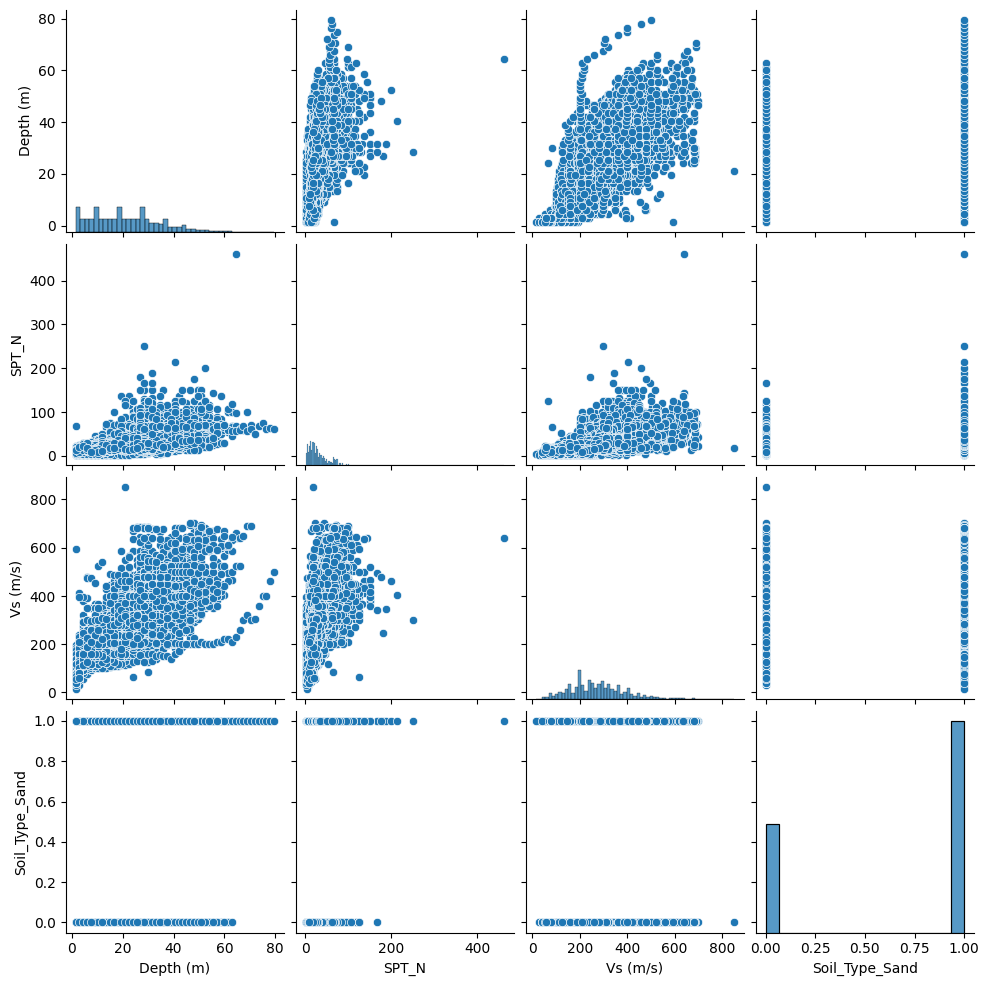

In [30]:
sns.pairplot(data)